In [9]:
import torch
import numpy as np
import random

from Data.utils import transfer_date_to_id
from Data.Solardataloader import transfer_log1p,enhance_funciton
from Data import Solardataloader_subset
from Model.get_weights_tq import get_weights

start_date = transfer_date_to_id(2020, 6, 30)
end_date = transfer_date_to_id(2024, 6, 30)
print(start_date,end_date)

random.seed(0)

val_loader = Solardataloader_subset.get_loader_by_time(load_imgs=False,time_step=12*60,time_interval=[start_date,end_date] , enhance_list=[1024,0,0], batch_size=5, num_workers=16)

with torch.no_grad():
    for i,data in enumerate(val_loader):
        image_mag = data[:,0,:,:,:]
        image_0094 = data[:,1,:,:,:]
        image_mag = enhance_funciton(image_mag, 'log1p', 1)
        image_0094 = enhance_funciton(image_0094, 'log1p', 1)
        weights_mag, _ = get_weights('cv-rdbu', image_mag)
        weights_0094, _ = get_weights('3sgm-continous', image_0094)
        # weights_0094, _ = get_weights('3sgm-discrete', image_0094)
        break

vis_ids = np.arange(5)
image_mag = image_mag[vis_ids].cpu().numpy()
# image_mag_enhance = transfer_log1p(image_mag)
image_mag_recon = weights_mag[vis_ids].cpu().numpy()    
image_0094 = image_0094[vis_ids].cpu().numpy()
# image_0094_enhance = transfer_log1p(image_0094)
image_0094_recon = weights_0094[vis_ids].cpu().numpy()



5346720 7450560
 magnet has 72889 samples
 0094 has 120206 samples
All modal has 1707 samples


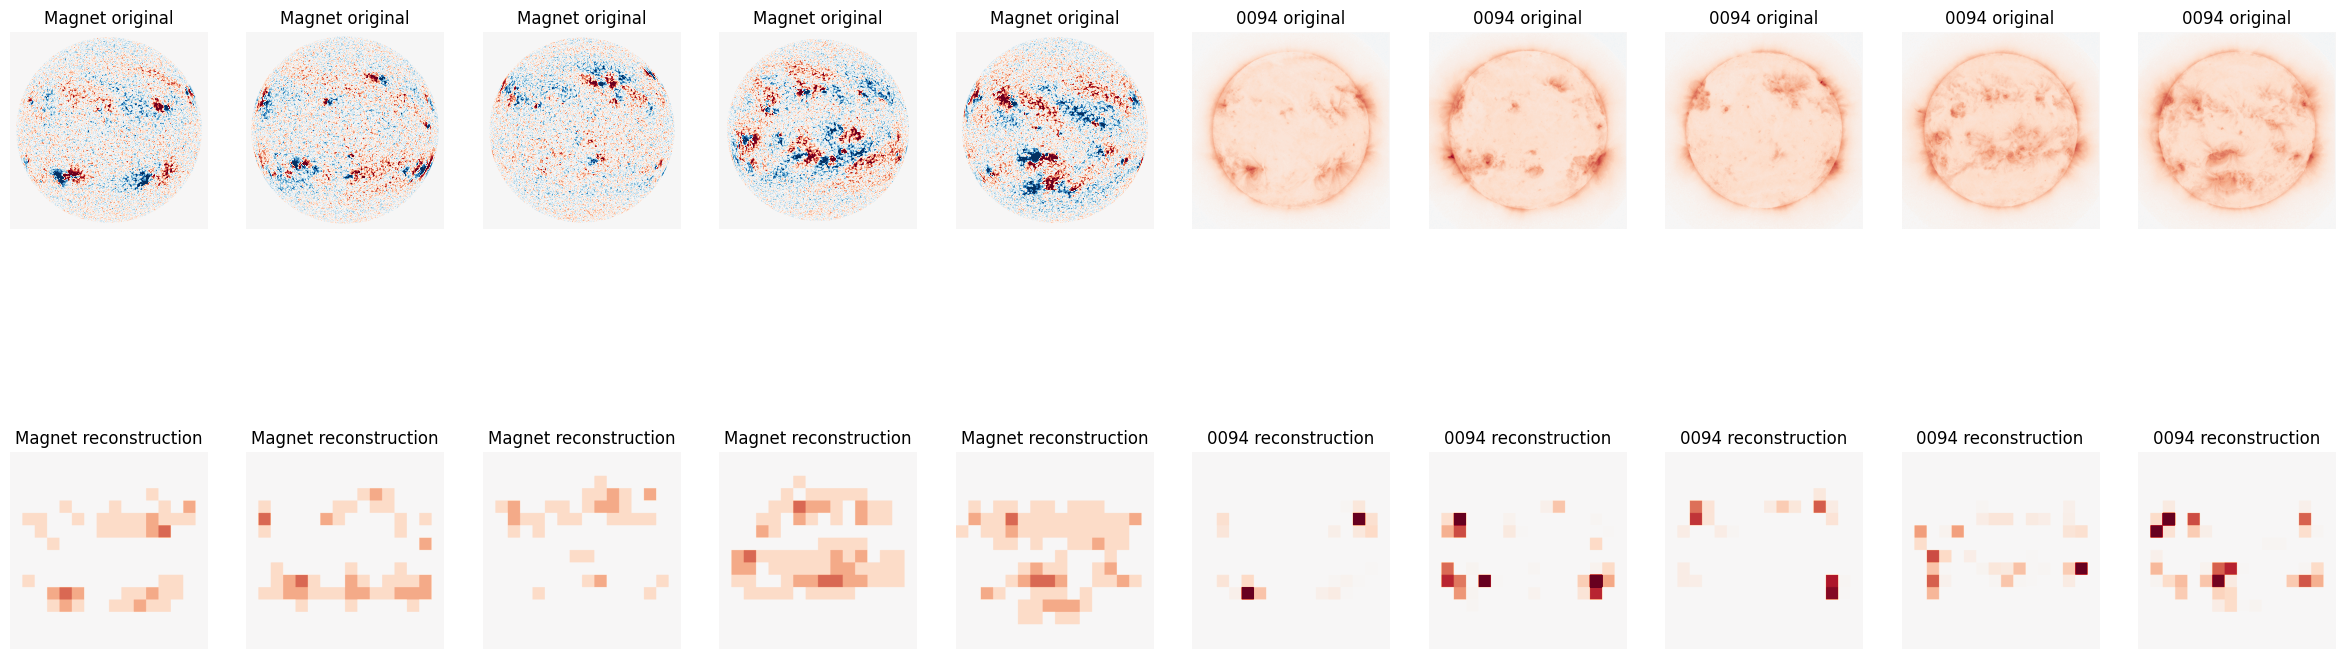

In [10]:
import matplotlib.pyplot as plt


vmin_magnet = np.min(image_mag)
vmax_magnet = np.max(image_mag)
vmax_magnet = np.max([np.abs(vmin_magnet), np.abs(vmax_magnet)])/2
vmin_magnet = -vmax_magnet
vmin_0094 = -np.max(image_0094)
vmax_0094 = np.max(image_0094)

plt.figure(figsize=(30, 10))
for i in range(5):
    plt.subplot(2, 10, i+1)
    plt.imshow(image_mag[i,0,:,:], cmap='RdBu_r',vmin=vmin_magnet, vmax=vmax_magnet)
    plt.axis('off')
    plt.title('Magnet original')
    plt.subplot(2, 10, i+6)
    plt.imshow(image_0094[i,0,:,:], cmap='RdBu_r',vmin=vmin_0094, vmax=vmax_0094)
    plt.axis('off')
    plt.title('0094 original')
    plt.subplot(2, 10, i+11)
    plt.imshow(image_mag_recon[i,0,:,:], cmap='RdBu_r',vmin=vmin_magnet, vmax=vmax_magnet)
    plt.axis('off')
    plt.title('Magnet reconstruction')
    plt.subplot(2, 10, i+16)
    plt.imshow(image_0094_recon[i,0,:,:], cmap='RdBu_r',vmin=vmin_0094, vmax=vmax_0094)
    plt.axis('off')
    plt.title('0094 reconstruction')